In [30]:
import tensorflow as tf
import numpy as np 
import gym 
import networkx as nx
import math 
from geneticalgorithm import geneticalgorithm as ga
#from tensorflow import keras


In [31]:
#proviamo prima una fully connected
n = 3
m = 4
k=n*m
RailCost=0
StopCost=0

#la mappa è un lattice i cui nodi rappresentano le POSSIBILI stazioni 
MapMatrix= np.zeros(shape=( n, m))

#La così detta amtrice verdhttp://localhost:8888/notebooks/Metropolitan.py.ipynb#e, dato che vogliamo usare keras, possiamo generarla a priori un numero arbitrario di volte e trattare il problema come semi-supervisionato
#in questo caso le sezioni di TravelBank sono le TravelMatrix
NumberOfCities=1000
MaxPeople=1000

TravelPeople=np.random.randint(MaxPeople,size=(n*m))
TravelBank=np.zeros(shape=(NumberOfCities,n*m,n*m,))
for s in range(NumberOfCities):
    TravelBank[s] = np.random.rand(n*m, n*m)
    for i in range(k):
        for j in range(k):
            if(i==j):
                TravelBank[s,i,j]=0
for s in range(NumberOfCities):
    for i in range(k):
        somma=TravelBank[s,i].sum()
        for j in range(k):
            TravelBank[s,i,j]=TravelBank[s,i,j]/somma#costruisce matrici con colonne normalizzate.            
def AssignCoordinates(MapMatrix,v):#v is a number associated to the vth node in the network 
    #assigns coordinates to a node in a map 
    n=len(MapMatrix)
    m=len(MapMatrix[0])
    coord=np.zeros(shape=(2))
    coord[0]=v%n  #x of v 
    coord[1]=math.floor(v/n)  #y of v #in coordinate eculideee a aprtire da 0
    return coord
def EuclideanDist(MapMatrix,v,w):
    W_coords=np.zeros(shape=(2))
    V_coords=np.zeros(shape=(2))
    W_coords=AssignCoordinates(MapMatrix,w)
    V_coords=AssignCoordinates(MapMatrix,v)
    return math.sqrt((W_coords[0]-V_coords[0]+1)*(W_coords[0]-V_coords[0]+1)+(W_coords[1]-V_coords[1]+1)*(W_coords[1]-V_coords[1]+1))


StateMatrix = np.zeros(shape=(n*m, n*m))


TravelMatrix=TravelBank[0]
MaxBinari=75
def RewardFunction(StateMatrix):
    #StateMatrix1=np.zeros(shape=(k,k))
    Reward=0
    CountBinari=0
    StateMatrix1=np.zeros(shape=(k,k))
    StateMatrix1=np.reshape(StateMatrix,(k,k))
    for i in range(k):
        for j in range(k):
            if((i != j) and StateMatrix1[i,j]==0):
                 StateMatrix1[i,j]=50
            else:
                 CountBinari+=1
    for i in range(k):
        for j in range((k)):
            StateMatrix1[i,j]=StateMatrix1[i,j]*EuclideanDist(MapMatrix,i,j)#StateMatrix diventa una matrice che contiene la distanza euclidea nelle entrate
    StateGraph=nx.DiGraph(StateMatrix1)
    for i in range(k):
        for j in range((k)):
            if(i!=j):
                Reward+=(TravelPeople[i]*(TravelMatrix[i,j]))/(nx.algorithms.shortest_paths.weighted.dijkstra_path_length(StateGraph,i,j)) - RailCost* CountBinari -  CountBinari*StopCost
            if(CountBinari>MaxBinari and i!=j):
                Reward-=50000*(CountBinari-MaxBinari)
    return -Reward 

def RewardFunction1(StateMatrix):
    #StateMatrix1=np.zeros(shape=(k,k))
    Reward=0
    CountBinari=0
    StateMatrix1=np.zeros(shape=(k,k))
    
    for i in range(k):
        for j in range(k):
            StateMatrix1[i,j]=StateMatrix[n*i +j]
            StateMatrix1[j,i]=StateMatrix[n*i +j]
            if((i != j) and StateMatrix1[i,j]==0):
                 StateMatrix1[i,j]=50
                 StateMatrix1[j,i]=50
            else:
                 CountBinari+=1
    
    for i in range(k):
        for j in range((k)):
            StateMatrix1[i,j]=StateMatrix1[i,j]*EuclideanDist(MapMatrix,i,j)#StateMatrix diventa una matrice che contiene la distanza euclidea nelle entrate
    StateGraph=nx.DiGraph(StateMatrix1)
    for i in range(k):
        for j in range((k)):
            if(i!=j):
                Reward+=(TravelMatrix[i,j])/(nx.algorithms.shortest_paths.weighted.dijkstra_path_length(StateGraph,i,j)) - RailCost* CountBinari -  CountBinari*StopCost
            if(CountBinari>MaxBinari and i!=j):
                Reward-=50000*(CountBinari-MaxBinari)
    return -Reward

 The best solution found:                                                                           
 [0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.]

 Objective function:
 -5.297117317908038


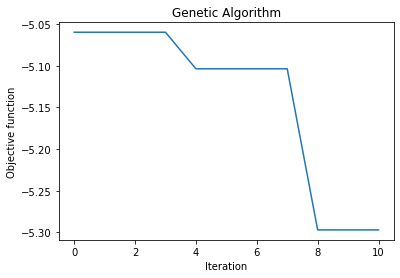

[0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.]


C:\ProgramData\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


[[0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.]]
count: 71


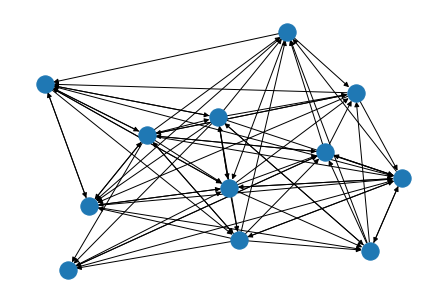

In [32]:
def Dijkstra(StateMatrix,source,target):
#l'algo calcola un array di distanze(una per ogni nodo del grafo
    Distances=np.array([])
    Queue=np.array([])
    Visited=np.array([])
    for s in range(k):
        if(s != source):
            Distances=np.append(Distances,100000000) 
        else:
            Distances=np.append(Distances,0) 
        Queue=np.append(Queue,s)
    v=0
    switch=1
    while(len(Queue)!=0 and switch):
        print((np.where(Distances == np.sort(Distances)[len(Visited)])[0])[0])
        print(Queue)
        print(Visited)
        print(Distances)
        if(v!=((np.where(Distances == np.sort(Distances)[len(Visited)])[0])[0]) or v==0):
            v= ( ((np.where(Distances == np.sort(Distances)[len(Visited)])[0])[0]))#devo escludere dalle distanze quell ivisitati?
        else:
            v= ( ((np.where(Distances == np.sort(Distances)[len(Visited)])[0])[1]))
        if(int(v) not in Visited):
            print("in")
            Queue=np.delete(Queue, int((np.where(Queue==int((np.where(Distances == np.sort(Distances)[len(Visited)])[0])[0]))[0])[0]))
            Visited=np.append(Visited,v)
        for u in range(k):
            if(StateMatrix[v,u]!=0):
                tempDist=Distances[v]+StateMatrix[v,u]
                 
                if(tempDist<Distances[u]):
                    Distances[u]=tempDist
    #print(Distances)
    return Distances[target]

#testing
#A= np.random.rand(n*m, n*m)
#print(RewardFunction(A))
algorithm_param = {'max_num_iteration': 10,\
                   'population_size':100,\
                   'mutation_probability':0.9,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
model=ga(function=RewardFunction1,dimension=k*k,variable_type='bool', algorithm_parameters=algorithm_param)
model.run()
array = np.array(list(model.output_dict.items()))
print(array[0][1])
out=np.reshape(array[0][1],(k,k))
count1=0
for i in range(k):
    for j in range(k):
        if(i==j):
            out[i,j]=0
        if(out[i,j]==1):
            count1+=1
OutGraph=nx.DiGraph(out)
nx.draw(OutGraph)
print(out)
print("count:",count1)
OutGraphGreen=nx.DiGraph(TravelMatrix)
#print("hello")
#nx.draw(OutGraphGreen)
#evidentemente per città molto più grandi gli serve moltop iù tempo per convergere
#si può modificare l'algoritmo per dare semplicemente in entrata un vettore contente solo le posizioni in cui ci siano effettivamente i binari(poi però non sarebbe booleano) 